In [1]:
### required libraries for gathering and cleaning the data
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import io

#  GATHERING DATA

Gathering Data for this Project
Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

1. The WeRateDogs Twitter archive via manual download
2. Programatically for Tweet image predictions via https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
3. Query the Twitter API via IDS from weratedogs twitter archive.

## The WeRateDogs Twitter archive

The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

In [2]:
twiter_arc_enc = pd.read_csv("twitter-archive-enhanced.csv")
twiter_arc_enc.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
269,841320156043304961,NaN,NaN,2017-03-13 16:08:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...","We don't rate penguins, but if we did, this on...",NaN,NaN,NaN,https://twitter.com/abc/status/841311395547250688,12,10,None,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1933,674019345211760640,NaN,NaN,2015-12-08 00:15:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Acro. You briefly see her out of the c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674019345...,10,10,Acro,None,None,None,None
1348,704347321748819968,NaN,NaN,2016-02-29 16:47:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphson. He's very confused. Wonderin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704347321...,10,10,Ralphson,None,None,pupper,None
1338,705066031337840642,NaN,NaN,2016-03-02 16:23:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reese. He's a Chilean Sohcahtoa. Loves...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705066031...,12,10,Reese,None,None,None,None


In [3]:
twiter_arc_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## Tweet image predictions

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [5]:
requests.get(url).encoding

'utf-8'

In [6]:
r = requests.get(url).content

In [7]:
tweet_image_pred = pd.read_table(io.StringIO(r.decode('utf-8'))) # io.StringIO is for reading a table from a string

In [8]:
tweet_image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1573,795400264262053889,https://pbs.twimg.com/media/CwnUUGTWIAE8sFR.jpg,2,golden_retriever,0.925494,True,Labrador_retriever,0.059241,True,tennis_ball,0.004495,False
158,668872652652679168,https://pbs.twimg.com/media/CUhQIAhXAAA2j7u.jpg,1,teddy,0.413379,False,pillow,0.325623,False,miniature_schnauzer,0.035537,True
1061,715200624753819648,https://pbs.twimg.com/media/CeznK6IWEAEFUPq.jpg,1,Chihuahua,0.956787,True,beagle,0.008383,True,Labrador_retriever,0.008344,True
1559,793256262322548741,https://pbs.twimg.com/media/CwI2XCvXEAEO8mc.jpg,1,basset,0.207622,True,Walker_hound,0.060574,True,beagle,0.041221,True
20,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True
222,670290420111441920,https://pbs.twimg.com/media/CU1Zgk7UcAAjw2t.jpg,1,Chihuahua,0.368876,True,Pomeranian,0.282102,True,papillon,0.178795,True
1647,808733504066486276,https://pbs.twimg.com/media/Czky0v9VIAEXRkd.jpg,1,seat_belt,0.779137,False,toy_poodle,0.036927,True,golden_retriever,0.016972,True
462,674805413498527744,https://pbs.twimg.com/ext_tw_video_thumb/67480...,1,English_springer,0.594467,True,cocker_spaniel,0.389994,True,Welsh_springer_spaniel,0.007096,True
1682,813910438903693312,https://pbs.twimg.com/media/C0uXObSXUAAIzmV.jpg,1,Siberian_husky,0.699355,True,Eskimo_dog,0.256433,True,Norwegian_elkhound,0.013189,True
1192,739979191639244800,https://pbs.twimg.com/media/CkTvJTdXAAAEfbT.jpg,1,Irish_water_spaniel,0.285800,True,wig,0.240653,False,toy_poodle,0.074914,True


In [9]:
tweet_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Query the Twitter API 

Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

## DELETE the actual key, secret, and token but leave for referance

In [ ]:
import tweepy

consumer_key = 'x'
consumer_secret = 'x'

access_token = 'x'
access_secret = 'x'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True) ### http://docs.tweepy.org/en/v3.2.0/api.html#API

In [ ]:
# list of ids from WeRateDogs Twitter's archice for querying
# sum(twiter_arc_enc["tweet_id"].duplicated())
query_list = list(twiter_arc_enc["tweet_id"])

In [ ]:
len(query_list) / 4 ### split querying the twitter API in 4 groups 0:589, 590:1179, 1180:1769, 1770:2356

http://python.mfamt.org/content/recipes/apis-and-scraping/tweepy-introduction/

In [ ]:
### I have commented this section out so I accidentaly don t run it again :)
#list_of_tweetsJSONs = []
#for i in query_list:
#    try:
 #       tweet = api.get_status(i, tweet_mode='extended')
  #      list_of_tweetsJSONs.append(tweet._json)
        ## This cell is slow so print ranking to gauge time remaining
  #      ranking = query_list.index(i) + 1
   #     print(ranking)
   # except Exception as e:
    #    print(str(e))

In [ ]:
# len (query_list) - len(list_of_tweetsJSONs) ### 9 of the IDs are not found on the twitter

In [11]:
### write each json element from a list of tweets in a txt file as a new line

filename = 'tweet_json.txt'

with open(filename, mode="w") as file:  # also, tried mode="rb"
    for d in list_of_tweetsJSONs:
        file.write(json.dumps(d)  + "\n")

In [14]:
### read tweet_json.txt and create pandas data frame for selected json columns
tweet_id = []
retweeted = []
favourites_count = []
retweet_count = []
created_at = []

with open('tweet_json.txt') as json_file:
    for line in json_file.readlines():
        data = json.loads(line)
        tweet_id.append(data["id"])
        retweeted.append(data["retweeted"]) 
        favourites_count.append(data["user"]["favourites_count"])
        retweet_count.append(data["retweet_count"])
        created_at.append(data["created_at"])

    

In [15]:
### build pandas dataframe from lists
twitter_api = pd.DataFrame({"tweet_id" : tweet_id, "retweeted" : retweeted, "retweet_count": retweet_count,"favourites_count" : favourites_count,  "created_at" : created_at})

In [16]:
twitter_api.head()

,created_at,favourites_count,retweet_count,retweeted,tweet_id
0,Tue Aug 01 16:23:56 +0000 2017,130386,8705,False,892420643555336193
1,Tue Aug 01 00:17:27 +0000 2017,130386,6387,False,892177421306343426
2,Mon Jul 31 00:18:03 +0000 2017,130386,4245,False,891815181378084864
3,Sun Jul 30 15:58:51 +0000 2017,130386,8802,False,891689557279858688
4,Sat Jul 29 16:00:24 +0000 2017,130386,9586,False,891327558926688256


### 3 relevant pandas dataframe for assesment

In [17]:
twiter_arc_enc.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1984,672902681409806336,NaN,NaN,2015-12-04 22:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimison. He's stuck in a pot. Damn it ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672902681...,9,10,Jimison,None,None,None,None
1500,692158366030913536,NaN,NaN,2016-01-27 01:33:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Edgar. He's a Sassafras Puggleflash. N...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692158366...,10,10,Edgar,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1846,675822767435051008,NaN,NaN,2015-12-12 23:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10s ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675822767...,10,10,None,None,None,None,None
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770655142...,11,10,very,None,None,None,None


In [18]:
tweet_image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
478,675334060156301312,https://pbs.twimg.com/media/CV9EvZNUwAAgLCK.jpg,2,Pembroke,0.773135,True,Cardigan,0.116810,True,chow,0.039036,True
573,678424312106393600,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1,Maltese_dog,0.759945,True,toy_poodle,0.101194,True,Shih-Tzu,0.056037,True
1752,824325613288833024,https://pbs.twimg.com/media/C3CXxaoWQAAiLuC.jpg,1,Pembroke,0.990793,True,Cardigan,0.008919,True,basenji,0.000262,True
163,668960084974809088,https://pbs.twimg.com/media/CUifpn4WUAAS5X3.jpg,1,shower_curtain,0.226309,False,Chesapeake_Bay_retriever,0.165878,True,bathtub,0.056726,False
88,667530908589760512,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,1,golden_retriever,0.633037,True,kuvasz,0.146391,True,Labrador_retriever,0.046184,True


In [19]:
twitter_api.sample(5)

,created_at,favourites_count,retweet_count,retweeted,tweet_id
782,Thu Sep 08 02:09:06 +0000 2016,130386,1848,False,773704687002451968
1211,Tue Mar 29 00:12:05 +0000 2016,130386,1027,False,714606013974974464
1823,Mon Dec 14 00:07:50 +0000 2015,130386,1129,False,676191832485810177
1629,Tue Jan 05 01:44:52 +0000 2016,130386,1317,False,684188786104872960
1128,Thu May 05 02:21:37 +0000 2016,130386,1297,False,728046963732717569


# Assessment

Assessing Data for this Project
After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

Visual assessment: each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. Once displayed, data can additionally be assessed in an external application (e.g. Excel, text editor).

Programmatic assessment: pandas' functions and/or methods are used to assess the data.

### Visual assessment

In [20]:
twiter_arc_enc.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
654,791821351946420224,NaN,NaN,2016-10-28 01:58:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This little fella really hates ...,6.848310e+17,4.196984e+09,2016-01-06 20:16:44 +0000,"https://vine.co/v/eEZXZI1rqxX,https://vine.co/...",13,10,None,None,None,pupper,None
505,812781120811126785,NaN,NaN,2016-12-24 22:04:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Swagger. He's the Cleveland Browns amb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812781120...,10,10,Swagger,None,None,None,None
271,841077006473256960,NaN,NaN,2017-03-13 00:02:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dawn. She's just checking pup on you. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841077006...,12,10,Dawn,None,None,None,None
80,877316821321428993,NaN,NaN,2017-06-21 00:06:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dante. At first he wasn't a fan of his ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877316821...,13,10,Dante,None,None,None,None
1809,676864501615042560,NaN,NaN,2015-12-15 20:40:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ash. He's just a head now. Lost his body ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676864501...,10,10,Ash,None,None,None,None


In [21]:
tweet_image_pred.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1096,720059472081784833,https://pbs.twimg.com/media/Cf4qRcmWEAA9V4h.jpg,1,Mexican_hairless,0.451852,True,redbone,0.254884,True,Italian_greyhound,0.094818,True
30,666418789513326592,https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg,1,toy_terrier,0.149680,True,papillon,0.148258,True,Chihuahua,0.142860,True
1474,780459368902959104,https://pbs.twimg.com/media/CtS_p9kXEAE2nh8.jpg,1,Great_Dane,0.382491,True,German_shepherd,0.312026,True,bull_mastiff,0.033272,True


In [22]:
twitter_api.sample(2)

,created_at,favourites_count,retweet_count,retweeted,tweet_id
1907,Tue Dec 08 19:19:32 +0000 2015,130386,7519,False,674307341513269249
613,Tue Nov 08 22:25:27 +0000 2016,130386,2764,False,796116448414461957


In [41]:
pd.options.display.max_colwidth = 150
pd.set_option('display.max_rows', 2000)

In [42]:
id = 681340665377193000

In [45]:
twiter_arc_enc.query("tweet_id == 883482846933004288") ### tweet_id 883482846933004288 has a decimal 13.5; 667550882905632768 has -5 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None


In [44]:
twiter_arc_enc[["tweet_id","text", "rating_numerator"]]

,tweet_id,text,rating_numerator
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",13
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",12
5,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https:/...,13
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H htt...,13
7,890729181411237888,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13
8,890609185150312448,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13
9,890240255349198849,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co...,14


### Tidiness

Display randomly observations from all 3 tables to visually inspect for tidines issues

**twiter_arc_enc dataframe:**
 
1. there are None values for doggo, floofer, pupper, puppo columns and since it there is always one value from four filled it means that data needs to be melted in a column dog_stage **(done)**

**tweet_image_pred dataframe:**

2. dataframe can be joined onto twiter_arc_enc **(done)**


**twitter_api dataframe:**

1. dataframe can be joined to twiter_arc_enc **(done)**

### Quality 

**twiter_arc_enc dataframe:**

1. rating_numerator does not have correct numbers extracted from status tweets for example ### tweet_id 883482846933004288 has a decimal 13.5

2. Source column contains html links embeded in html as strings **(done)**

3. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp - remove after removing retweets.


**tweet_image_pred dataframe:**

1. p1. p2 and p3 columns have a lot of variations in the cells, like for example - or _ as a space between words, varied capitalsiation - capitalize and remove - and _   **(done)**

2. remove p1_dog, p2_dog and p3_dog == False ("Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.") **(done)**

**twitter_api dataframe:**



### Programatical assessment

### Tidiness and Quality

In [46]:
twiter_arc_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [47]:
tweet_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [48]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 5 columns):
created_at          2347 non-null object
favourites_count    2347 non-null int64
retweet_count       2347 non-null int64
retweeted           2347 non-null bool
tweet_id            2347 non-null int64
dtypes: bool(1), int64(3), object(1)
memory usage: 75.7+ KB


In [49]:
twiter_arc_enc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [50]:
twiter_arc_enc.describe(include=['O'])

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,2356,2356,2356,2356,2356
unique,2356,4,2356,181,2218,957,2,2,2,2
top,2017-01-27 17:04:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Marq. He stole this car. 7/10 wtf Marq? https://t.co/MHScqo5l8c,2017-01-27 17:04:02 +0000,https://twitter.com/dog_rates/status/759923798737051648/photo/1,None,None,None,None,None
freq,1,2221,1,1,2,745,2259,2346,2099,2326


In [51]:
twiter_arc_enc.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [52]:
sum(twiter_arc_enc["tweet_id"].duplicated())

0

In [53]:
sum(twiter_arc_enc["retweeted_status_user_id"].duplicated())

2330

In [54]:
tweet_image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [55]:
tweet_image_pred.describe(include=['O'])

,jpg_url,p1,p2,p3
count,2075,2075,2075,2075
unique,2009,378,405,408
top,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,golden_retriever,Labrador_retriever,Labrador_retriever
freq,2,150,104,79


In [56]:
sum(tweet_image_pred["tweet_id"].duplicated())

0

In [57]:
twitter_api.describe()

,favourites_count,retweet_count,tweet_id
count,2347.00000,2347.000000,2.347000e+03
mean,130386.02386,3066.215594,7.423783e+17
std,0.21719,5092.161760,6.836841e+16
min,130386.00000,0.000000,6.660209e+17
25%,130386.00000,612.000000,6.783846e+17
50%,130386.00000,1434.000000,7.189719e+17
75%,130386.00000,3570.500000,7.987038e+17
max,130388.00000,78254.000000,8.924206e+17


In [58]:
sum(twitter_api["retweet_count"] == 0)

1

In [59]:
twitter_api.describe(include=['O'])

,created_at
count,2347
unique,2347
top,Thu Nov 19 17:26:08 +0000 2015
freq,1


In [60]:
sum(twitter_api["tweet_id"].duplicated())

0

In [61]:
twiter_arc_enc["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### Tidiness

All tidiness questions have been addressed in visual inspection.



### Quality 

** twiter_arc_enc** dataframe:

1. as already seen in visual inspection there are 6 columns that are not complete in termes of non-null objects 

2. timestamp should be converted to time object **(done)**

3. rating_denumerator and rating_numerator have max values of 1776 and 170 - investigate since 75th percentile is 12 and 10 respectively.  **(will not fix since it is anyway fictional)**

4. rating_denominator should be 10, so everything that is different than 10 should be converted to 10.  **(done)**

**tweet_image_pred** dataframe:

1. name column has non names as "a", "an", "his", "my", "one"  **(done)**

**twitter_api** dataframe:

1. created at should be converted from object to timestamp **(done)**


* in all tables, tweet_id shoud be a string and not int **(done)**


# Cleaning

Create copies of dataframes for cleaning:

In [63]:
twiter_arc_enc_copy = twiter_arc_enc.copy()
tweet_image_pred_copy = tweet_image_pred.copy()
twitter_api_copy = twitter_api.copy()

Secondly lets remove retweets and keep the rows that have images ("You only want original ratings (no retweets) that have images")

In [64]:
twiter_arc_enc_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [65]:
tweet_image_pred_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [66]:
# keep only rows where retweeted_status_user_id is NaN
twiter_arc_enc_copy = twiter_arc_enc_copy[pd.isnull(twiter_arc_enc_copy['retweeted_status_user_id'])] 

 Before joins I will convert tweet_id in all tables to strings

In [98]:
twiter_arc_enc_copy["tweet_id"] =  pd.Series.astype(twiter_arc_enc_copy["tweet_id"],  dtype='object')
tweet_image_pred_copy["tweet_id"] =  pd.Series.astype(tweet_image_pred_copy["tweet_id"],dtype='object') 
twitter_api_copy["tweet_id"] =  pd.Series.astype(twitter_api_copy["tweet_id"],dtype='object')

In [106]:
twitter_api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 5 columns):
created_at          2347 non-null object
favourites_count    2347 non-null int64
retweet_count       2347 non-null int64
retweeted           2347 non-null bool
tweet_id            2347 non-null object
dtypes: bool(1), int64(2), object(2)
memory usage: 75.7+ KB


In [107]:
# join twiter_arc_enc_copy and tweet_image_pred_copy on twitter_id
merged = pd.merge(twiter_arc_enc_copy, tweet_image_pred_copy, how='left', on="tweet_id")
# join merged and twitter_api_copy on twitter_id
for_cleaning = pd.merge(merged, twitter_api_copy, how='left', on="tweet_id")

In [108]:
# keep only rows where jpg_url is not NaN
for_cleaning = for_cleaning[pd.notnull(for_cleaning['jpg_url'])] 

In [109]:
for_cleaning_copy = for_cleaning.copy()

In [110]:
for_cleaning_copy.shape

(1994, 32)

In [111]:
for_cleaning_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'created_at', 'favourites_count',
       'retweet_count', 'retweeted'],
      dtype='object')

In [112]:
# remove uneccessary columns
for_cleaning_copy = for_cleaning_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### DEFINE

Improve extraction of the rating_numerator (examples of values not extracted:tweet_id 883482846933004288 has a decimal 13.5). Use regular expressions to capture decimal numbers.

<font color=blue> **CODE** </font>

In [113]:
for_cleaning_copy.query("tweet_id == 883482846933004288")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,favourites_count,retweet_count,retweeted
42,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,...,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,Sat Jul 08 00:28:19 +0000 2017,130386,10190,False


In [114]:
for_cleaning_copy["rating_numerator"] = for_cleaning_copy["text"].str.extract(r"(-?\d*[.]?\d+)/")

C:\Users\Bruker\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


#### TEST

In [115]:
for_cleaning_copy[["text","rating_numerator"]]

,text,rating_numerator
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",13
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",12
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https:/...,13
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H htt...,13
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co...,14


####  DEFINE


Convert doggo, floofer, pupper, puppo None to NaN's. Create a flag for a dog stage and use the flag to create a new column called dog_stage.

<font color=blue> **CODE** </font>

In [116]:
# replace "None" with NaN
for_cleaning_copy = for_cleaning_copy.replace("None",np.nan)

In [117]:
# create a tag for is not null fo dog stages - jsut for planning and control
for_cleaning_copy["has_dog_stage"] = np.where(((for_cleaning_copy["doggo"].isnull()) & (for_cleaning_copy["floofer"].isnull()) & (for_cleaning_copy["pupper"].isnull()) & (for_cleaning_copy["puppo"].isnull())), "no", "yes" )

In [118]:
# concatenate 4 columns in one and fill NaN with empty string
for_cleaning_copy["dog_stage"] = for_cleaning_copy[['doggo', 'floofer', 'pupper', 'puppo']].fillna('').sum(axis=1)

In [119]:
# replace "" with NaN
for_cleaning_copy = for_cleaning_copy.replace("",np.nan)

In [120]:
# drop uneccessary columns
for_cleaning_copy = for_cleaning_copy.drop(['doggo', 'floofer', 'pupper', 'puppo', "has_dog_stage"], axis=1)

#### TEST

In [121]:
for_cleaning_copy.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,favourites_count,retweet_count,retweeted,dog_stage
1403,687109925361856513,NaN,NaN,2016-01-13 03:12:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Baxter. He looks like a fun dog. Prefers action shots. 11/10 the last one is impeccable https://t.co/LHcH1yhhIb,"https://twitter.com/dog_rates/status/687109925361856513/photo/1,https://twitter.com/dog_rates/status/687109925361856513/photo/1,https://twitter.co...",11,10,Baxter,...,0.022934,True,Saluki,0.021606,True,Wed Jan 13 03:12:26 +0000 2016,130386,2760,False,NaN
1560,679511351870550016,NaN,NaN,2015-12-23 03:58:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to William. He makes fun of others because he's terrified of his own deep-seated insecurities. 7/10 https://t.co/bwuV6FlRxr,https://twitter.com/dog_rates/status/679511351870550016/photo/1,7,10,William,...,0.150605,False,squirrel_monkey,0.028148,False,Wed Dec 23 03:58:25 +0000 2015,130386,1435,False,NaN
984,723688335806480385,NaN,NaN,2016-04-23 01:41:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Reginald. He starts screaming at random. 12/10 cuddly af https://t.co/YgNuDQbv89,"https://twitter.com/dog_rates/status/723688335806480385/photo/1,https://twitter.com/dog_rates/status/723688335806480385/photo/1",12,10,Reginald,...,0.089010,True,Irish_terrier,0.065306,True,Sat Apr 23 01:41:59 +0000 2016,130386,3285,False,NaN


In [122]:
for_cleaning_copy["dog_stage"].value_counts() ###note that doggopupper, doggopuppo and doggofloofer are a concatination since they have been present for the same tweet_id in two cathegories

pupper          203
doggo            63
puppo            22
doggopupper       9
floofer           7
doggofloofer      1
doggopuppo        1
Name: dog_stage, dtype: int64

In [123]:
for_cleaning.shape[0] == for_cleaning_copy.shape[0]

True

####  DEFINE

Name column is not always representing a name (a, an, my, one, his and None). Replace these values with NaN.

<font color=blue> **CODE** </font>

In [124]:
for_cleaning_copy["name"] = for_cleaning_copy["name"].replace("a",np.nan)

In [125]:
for_cleaning_copy["name"] = for_cleaning_copy["name"].replace("an", np.nan)

In [126]:
for_cleaning_copy["name"] = for_cleaning_copy["name"].replace("my", np.nan)

In [127]:
for_cleaning_copy["name"] = for_cleaning_copy["name"].replace("his", np.nan)

In [128]:
for_cleaning_copy["name"] = for_cleaning_copy["name"].replace("one", np.nan)

In [129]:
for_cleaning_copy["name"] = for_cleaning_copy["name"].replace("not", np.nan)

#### TEST

In [130]:
for_cleaning_copy.name.value_counts()

Charlie           11
Lucy              10
Cooper            10
Oliver            10
Penny              9
Tucker             9
Winston            8
Sadie              8
Lola               7
the                7
Toby               7
Daisy              7
Stanley            6
Bella              6
Koda               6
Jax                6
Bo                 6
Louis              5
Leo                5
Bailey             5
Dave               5
Rusty              5
Buddy              5
Scout              5
Oscar              5
Milo               5
Chester            5
Archie             4
Brody              4
Alfie              4
Reggie             4
Dexter             4
Gus                4
Finn               4
Larry              4
Maggie             4
Derek              4
Clark              4
Phil               4
very               4
Jack               4
Sophie             4
Duke               4
Bear               4
Winnie             4
Gary               4
Scooter            4
Oakley       

####  DEFINE

Parse time column (object) as timestamp.


<font color=blue> **CODE** </font>

In [131]:
for_cleaning_copy["timestamp"].head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [132]:
for_cleaning_copy["timestamp"] =  pd.to_datetime(for_cleaning_copy["timestamp"]) ## http://strftime.org/


#### TEST

In [133]:
for_cleaning_copy["timestamp"].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

####  DEFINE


rating_denominator should be 10, so everything that is different than 10 should be converted to 10.

<font color=blue> **CODE** </font>

In [134]:
# replace "rating_denominator > 10 with 10
for_cleaning_copy["rating_denominator"] = for_cleaning_copy.replace(for_cleaning_copy.query("rating_denominator > 10"), 10)

In [135]:
for_cleaning_copy["rating_denominator"] = np.where(for_cleaning_copy["rating_denominator"]>10, 10, for_cleaning_copy["rating_denominator"])

#### TEST

In [136]:
for_cleaning_copy.query("rating_denominator > 10").shape[0] == 0

True

####  DEFINE

Clean html tags from for_cleaning_copy["source"] strings.

<font color=blue> **CODE** </font>

In [137]:
for_cleaning_copy["source"] = for_cleaning_copy["source"].str.extract('(http://[a-zA-Z]*.com/[a-zA-Z]*)')

C:\Users\Bruker\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


#### TEST

In [138]:
for_cleaning_copy["source"].sample(5)

2094                            NaN
346     http://twitter.com/download
1156    http://twitter.com/download
174     http://twitter.com/download
407     http://twitter.com/download
Name: source, dtype: object

####  DEFINE

for p1, p2 and p3 columns - remove non dogs, i.e. dog flag == False

In [139]:
for_cleaning_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'created_at', 'favourites_count', 'retweet_count', 'retweeted',
       'dog_stage'],
      dtype='object')

<font color=blue> **CODE** </font>

In [140]:
# remove dog flags == False

In [141]:
for_cleaning_copy = for_cleaning_copy.query("p1_dog == True") 

In [142]:
for_cleaning_copy = for_cleaning_copy.query("p2_dog == True") 

In [143]:
for_cleaning_copy = for_cleaning_copy.query("p3_dog == True") 

#### TEST

In [144]:
for_cleaning_copy.query("p1_dog == False").shape[0] 

0

In [145]:
for_cleaning_copy.query("p2_dog == False").shape[0] == 0

True

In [146]:
for_cleaning_copy.query("p3_dog == False").shape[0] == 0

True

In [147]:
# remove columns for flags
for_cleaning_copy.drop(["p1_dog", "p2_dog", "p3_dog"], axis=1, inplace=True)

In [148]:
for_cleaning_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p2', 'p2_conf', 'p3', 'p3_conf', 'created_at', 'favourites_count',
       'retweet_count', 'retweeted', 'dog_stage'],
      dtype='object')

####  DEFINE

p1, p2 and p3 columns: lower case and remove "_" and "-"

<font color=blue> **CODE** </font>

In [149]:
for_cleaning_copy["p1"] = for_cleaning_copy["p1"].replace("[-_]", ' ', regex=True).str.lower()

In [150]:
for_cleaning_copy["p2"] = for_cleaning_copy["p1"].replace("[-_]", ' ', regex=True).str.lower()

In [151]:
for_cleaning_copy["p3"] = for_cleaning_copy["p1"].replace("[-_]", ' ', regex=True).str.lower()

#### TEST

In [152]:
for_cleaning_copy["p1"].sample(5)

1553             chihuahua
1821              doberman
1000              malamute
185                    pug
1573    labrador retriever
Name: p1, dtype: object

In [153]:
for_cleaning_copy["p2"].sample(5)

1706            giant schnauzer
2146    black and tan coonhound
826                     samoyed
1385                        pug
2018                   malinois
Name: p2, dtype: object

In [154]:
for_cleaning_copy["p3"].sample(5)

1904                basset
1739       german shepherd
59      miniature pinscher
959           newfoundland
438             rottweiler
Name: p3, dtype: object

####  DEFINE

Parse created at as datetime

<font color=blue> **CODE** </font>

In [155]:
for_cleaning_copy["created_at"] =  pd.to_datetime(for_cleaning_copy["created_at"]) #

#### TEST

In [156]:
for_cleaning_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 1 to 2174
Data columns (total 23 columns):
tweet_id                 1203 non-null int64
in_reply_to_status_id    9 non-null float64
in_reply_to_user_id      9 non-null float64
timestamp                1203 non-null datetime64[ns]
source                   1184 non-null object
text                     1203 non-null object
expanded_urls            1203 non-null object
rating_numerator         1203 non-null object
rating_denominator       1203 non-null object
name                     870 non-null object
jpg_url                  1203 non-null object
img_num                  1203 non-null float64
p1                       1203 non-null object
p1_conf                  1203 non-null float64
p2                       1203 non-null object
p2_conf                  1203 non-null float64
p3                       1203 non-null object
p3_conf                  1203 non-null float64
created_at               1203 non-null datetime64[ns]
favou

In [157]:
for_cleaning_copy.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p2,p2_conf,p3,p3_conf,created_at,favourites_count,retweet_count,retweeted,dog_stage
516,793226087023144960,NaN,NaN,2016-10-31 23:00:11,http://twitter.com/download,"This is Juno. She spooked me up real good, but only to get my attention. Above average handwriting for a dog I think. 11/10 https://t.co/hFxxBCWlwj","https://twitter.com/dog_rates/status/793226087023144960/photo/1,https://twitter.com/dog_rates/status/793226087023144960/photo/1,https://twitter.co...",11,10,Juno,...,0.456047,wire haired fox terrier,0.273428,wire haired fox terrier,0.083643,2016-10-31 23:00:11,130386,3279,False,NaN
1091,709449600415961088,NaN,NaN,2016-03-14 18:42:20,http://twitter.com/download,Meet Karma. She's just a head. Lost body during the Second Punic War (unfortunate). Loves to travel 10/10 petable af https://t.co/c6af6nYEPo,"https://twitter.com/dog_rates/status/709449600415961088/photo/1,https://twitter.com/dog_rates/status/709449600415961088/photo/1",10,10,Karma,...,0.780187,maltese dog,0.074429,maltese dog,0.033776,2016-03-14 18:42:20,130386,655,False,NaN
1965,669942763794931712,NaN,NaN,2015-11-26 18:16:16,http://twitter.com/download,This is Andru. He made his very own lacrosse stick. Much dedication. Big dreams. Tongue slip. 11/10 go get em Andru https://t.co/1VJoY3OJ1F,https://twitter.com/dog_rates/status/669942763794931712/photo/1,11,10,Andru,...,0.743216,vizsla,0.217282,vizsla,0.028473,2015-11-26 18:16:16,130386,180,False,NaN


# Export of wrangeled and clean table

In [158]:
for_cleaning_copy.to_csv("twitter_archive_master.csv", sep=',', encoding='utf-8')

# Analysis

In [159]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import datetime 

In [160]:
df = pd.read_csv("twitter_archive_master.csv")

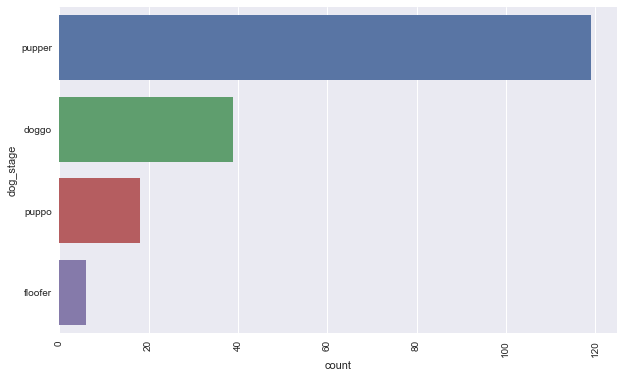

In [161]:
plt.figure(figsize=(10,6))
import seaborn as sns
sns.set(style="darkgrid")
data = df
ax = sns.countplot(y="dog_stage", data=data, order=df.dog_stage.value_counts().iloc[:4].index)
plt.xticks(rotation='vertical');

Pupper is most common dog stage amongst the tweets that have a dog stage present, which is followed by a doggo - age before wisdom :)

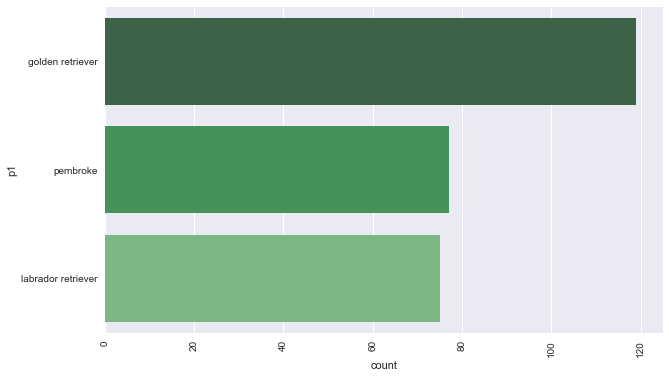

In [162]:
plt.figure(figsize=(10,6))
import seaborn as sns
sns.set(style="darkgrid")
data = df
ax = sns.countplot(y="p1" ,data=data,  palette="Greens_d",
              order=df.p1.value_counts().iloc[:3].index)
plt.xticks(rotation='vertical');

Since every image in the WeRateDogs Twitter archive was ran through a neural network that can classify breeds of dogs, in the chart above golden retriever has the highest count of predicted breed for p1 prediction, followed by pembroke and labrador retriever. Chart is only visualising top 3 breed counts.

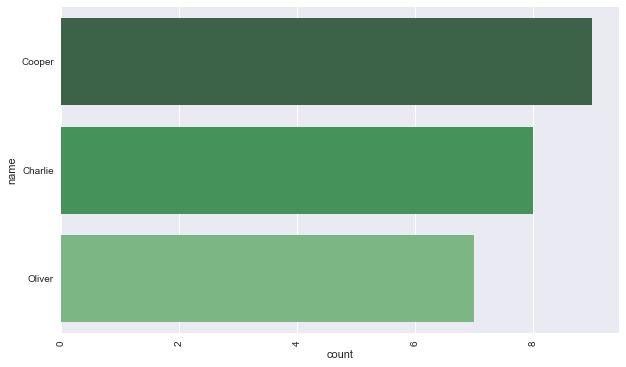

In [163]:
plt.figure(figsize=(10,6))
import seaborn as sns
sns.set(style="darkgrid")
data = df
ax = sns.countplot(y="name" ,data=data,  palette="Greens_d",
              order=df.name.value_counts().iloc[:3].index)
plt.xticks(rotation='vertical');

...and the top name has a winner - Cooper :)

In [164]:
df["retweet_count"].describe(percentiles = [.90])

count     1203.000000
mean      2731.921031
std       4593.872347
min         14.000000
50%       1403.000000
90%       6065.200000
max      61882.000000
Name: retweet_count, dtype: float64

In [165]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

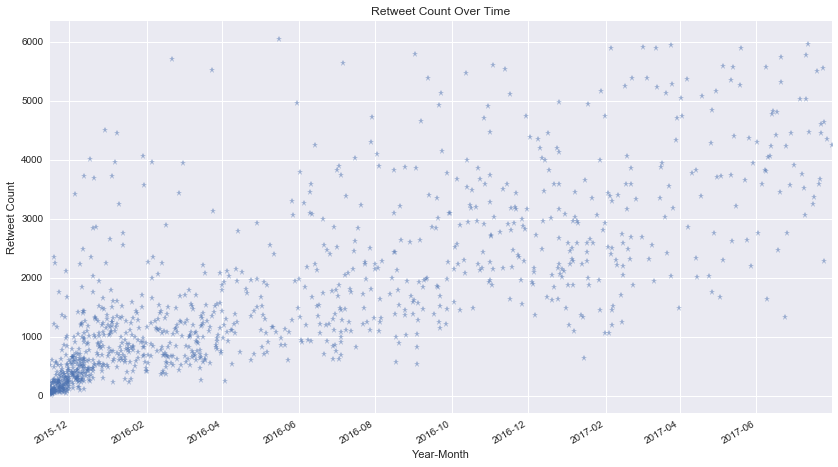

In [166]:
plt.figure(figsize=(14,8))
df.query("retweet_count < 6065")["retweet_count"].plot(style = '*',alpha =0.5)
plt.title('Retweet Count Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Retweet Count');

There is a trend of increase of the retweet from 2015 to 2017.

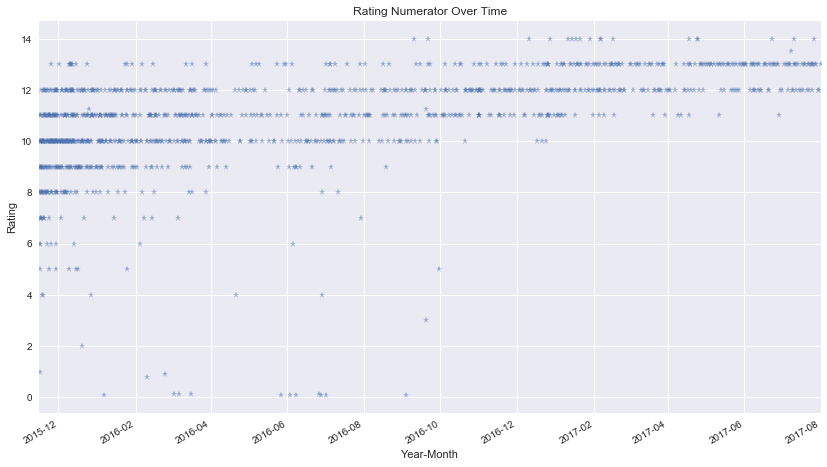

In [167]:
plt.figure(figsize=(14,8))
df.query("rating_numerator < 20")["rating_numerator"].plot(style = '*',alpha =0.5)
plt.title('Rating Numerator Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Rating');

There is a trend of increase of unusual numerator from 2015 to 2017 where in 2017 it is only restricted to 10 and above.